In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd drive/My Drive/graduation/code

In [ ]:
%%capture
!pip install transformers==3.5.1
import torch
import pandas as pd
from utils import *
from constants import *

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
path = data_path/"dataset.csv"
MAX_LEN = 256
batch_size = 32
learning_rate = 2e-5
epochs = 4

In [ ]:
preprocess(path, MAX_LEN, batch_size)

Number of training rows: 94,471

legit    0.554879
spam     0.445121
Name: tag, dtype: float64

Drop 680 row with null value

Number of remain rows: 93,791

Clean data        ... Elapsed time: 150.845
Number of remain rows: 93,723

Split data        ... Elapsed time: 0.060
Load Tokenizer    ...



Tokenize          ... Elapsed time: 47.780
Create DataLoader ... Elapsed time: 2.339
Save DataLoader   ... Elapsed time: 1.432


In [ ]:
# load saved data after preprocess
train_dataloader = torch.load(data_path/train_loader_file)
val_dataloader = torch.load(data_path/val_loader_file)
test_dataloader = torch.load(data_path/test_loader_file)

test_labels = pd.read_pickle(data_path/test_label_file)
test_labels = torch.tensor(test_labels.tolist())
train_labels = pd.read_pickle(data_path/train_label_file)

In [ ]:
model = init_model()
model = model.to(device)
optimizer = init_optimizer(model, learning_rate)
cross_entropy = loss_func(device, train_labels)

Init Model        ... Elapsed time: 9.201
Init Optimizer    ... Elapsed time: 0.002
Loss Function     ... Elapsed time: 0.018


In [ ]:
# start training
train(device, model, optimizer, cross_entropy, epochs, train_dataloader, val_dataloader)


 Epoch 1 / 4

Training...
  Batch    50  of  2,051.  Timer: 23.589
  Batch   100  of  2,051.  Timer: 23.970
  Batch   150  of  2,051.  Timer: 24.836
  Batch   200  of  2,051.  Timer: 25.776
  Batch   250  of  2,051.  Timer: 26.996
  Batch   300  of  2,051.  Timer: 26.207
  Batch   350  of  2,051.  Timer: 26.108
  Batch   400  of  2,051.  Timer: 26.397
  Batch   450  of  2,051.  Timer: 26.330
  Batch   500  of  2,051.  Timer: 26.331
  Batch   550  of  2,051.  Timer: 26.356
  Batch   600  of  2,051.  Timer: 26.343
  Batch   650  of  2,051.  Timer: 26.360
  Batch   700  of  2,051.  Timer: 26.333
  Batch   750  of  2,051.  Timer: 26.341
  Batch   800  of  2,051.  Timer: 26.341
  Batch   850  of  2,051.  Timer: 26.355
  Batch   900  of  2,051.  Timer: 26.369
  Batch   950  of  2,051.  Timer: 26.344
  Batch 1,000  of  2,051.  Timer: 26.361
  Batch 1,050  of  2,051.  Timer: 26.343
  Batch 1,100  of  2,051.  Timer: 26.264
  Batch 1,150  of  2,051.  Timer: 26.339
  Batch 1,200  of  2,051.  Tim

In [ ]:
# load best state of model
model.load_state_dict(torch.load(data_path/weight_file))

<All keys matched successfully>


Predicting...
  Batch    50  of    440.  Time: 25.527
  Batch   100  of    440.  Time: 25.638
  Batch   150  of    440.  Time: 25.508
  Batch   200  of    440.  Time: 25.306
  Batch   250  of    440.  Time: 25.313
  Batch   300  of    440.  Time: 25.308
  Batch   350  of    440.  Time: 25.326
  Batch   400  of    440.  Time: 25.309
Predict time: 223.249
Save Predictions  ... Elapsed time: 0.005
Accuray: 90.554%
ROC-AUC: 90.129%


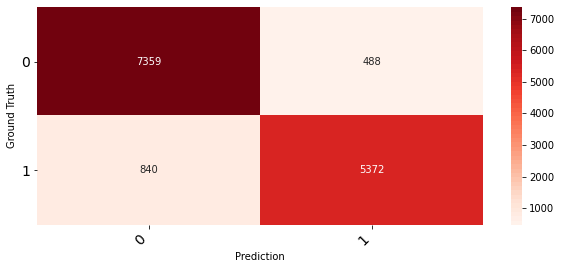

In [ ]:
predicts = predict_model(device, model, test_dataloader)

show_preds(predicts, test_labels)